# Wright-Fisher model of mutation and random genetic drift

A Wright-Fisher model has a fixed population size *N* and discrete non-overlapping generations. Each generation, each individual has a random number of offspring whose mean is proportional to the individual's fitness. Each generation, mutation may occur.

## Setup

In [73]:
import numpy as np

## Make population dynamic model

### Setup a population of sequences

Store this as a lightweight Dictionary that maps a string to a count. All the sequences together will have count *N*.

In [74]:
pop_size = 100

In [75]:
seq_length = 10

In [76]:
alphabet = ['A', 'T', 'G', 'C']

In [77]:
pop = {}

In [78]:
base_haplotype = "AAAAAAAAAA"

In [79]:
pop["AAAAAAAAAA"] = 40

In [80]:
pop["AAATAAAAAA"] = 30

In [81]:
pop["AATTTAAAAA"] = 30

In [82]:
pop["AAATAAAAAA"]

30

### Add mutation

Mutations occur each generation in each individual in every basepair.

In [83]:
mutation_rate = 0.002 # per gen per individual per site

Walk through population and mutate basepairs. Use Poisson splitting to speed this up. Poisson split works like so:
 * Scenario A: take each element and check for each if event occurs. For example, 100 elements, each with 1% chance. This requires 100 random numbers.
 * Scenario B: Draw a Poisson random number for the number of events that occur and distribute them randomly. In the above example, this will most likely involve 1 random number draw to see how many events and then a few more draws to see which elements are hit.

Need to get random number of total mutations

In [84]:
def get_mutation_count():
    mean = mutation_rate * pop_size * seq_length
    return np.random.poisson(mean)

Above we use Numpy's [Poisson random number](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html).

In [85]:
get_mutation_count()

2

Need to get random haplotype from the population.

In [86]:
pop.keys()

['AAAAAAAAAA', 'AAATAAAAAA', 'AATTTAAAAA']

In [87]:
[x/float(pop_size) for x in pop.values()]

[0.4, 0.3, 0.3]

In [88]:
def get_random_haplotype():
    haplotypes = pop.keys() 
    frequencies = [x/float(pop_size) for x in pop.values()]
    return np.random.choice(haplotypes, p=frequencies)

Above we use Numpy's [weighted random choice](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html).

In [89]:
hap = get_random_haplotype()

In [90]:
hap

'AATTTAAAAA'

In [91]:
def get_mutant(haplotype):
    site = np.random.randint(seq_length)
    possible_mutations = list(alphabet)
    possible_mutations.remove(haplotype[site])
    mutation = np.random.choice(possible_mutations)
    new_haplotype = haplotype[:site] + mutation + haplotype[site+1:]
    return new_haplotype

In [92]:
get_mutant(hap)

'AATTTACAAA'

In [93]:
def mutation_event():
    haplotype = get_random_haplotype()
    if pop[haplotype] > 1:
        pop[haplotype] -= 1
        new_haplotype = get_mutant(haplotype)
        if new_haplotype in pop:
            pop[new_haplotype] += 1
        else:
            pop[new_haplotype] = 1

In [94]:
mutation_event()

In [95]:
pop

{'AAAAAAAAAA': 39, 'AAAAAAAGAA': 1, 'AAATAAAAAA': 30, 'AATTTAAAAA': 30}

In [96]:
def mutation_step():
    mutation_count = get_mutation_count()
    for i in range(mutation_count):
        mutation_event()

In [97]:
mutation_step()

In [98]:
pop

{'AAAAAAAAAA': 39,
 'AAAAAAAGAA': 1,
 'AAATAAAAAA': 28,
 'AAATCAAAAA': 1,
 'AAATTAAAAA': 1,
 'AATTAAAAAA': 1,
 'AATTTAAAAA': 28,
 'AATTTAAACA': 1}

### Add genetic drift

In [99]:
def get_offspring_counts():
    haplotypes = pop.keys() 
    frequencies = [x/float(pop_size) for x in pop.values()]
    return list(np.random.multinomial(pop_size, frequencies))

In [100]:
get_offspring_counts()

[39, 4, 0, 25, 1, 1, 2, 28]

In [101]:
def offspring_step():
    counts = get_offspring_counts()
    for (haplotype, count) in zip(pop.keys(), counts):
        if (count > 0):
            pop[haplotype] = count
        else:
            del pop[haplotype]

In [102]:
offspring_step()

In [103]:
pop

{'AAAAAAAAAA': 39,
 'AAAAAAAGAA': 2,
 'AAATAAAAAA': 33,
 'AATTAAAAAA': 2,
 'AATTTAAAAA': 24}

### Combine and iterate

In [104]:
generations = 10

In [105]:
def time_step():
    mutation_step()
    offspring_step()

In [106]:
def simulate():
    for i in range(generations):
        time_step()

In [107]:
simulate()

In [108]:
pop

{'AAAAAAAAAA': 41,
 'AAAAAAAATA': 9,
 'AAAAAAAGAA': 12,
 'AAAAAAATAA': 1,
 'AAACAAAAAA': 2,
 'AAATAAAAAA': 16,
 'AAGTAAAAAA': 5,
 'AAGTAAACAA': 1,
 'AATTCAAAAA': 1,
 'AATTTAAAAA': 11,
 'ATATAAAAAA': 1}

### Record

In [109]:
pop = {"AAAAAAAAAA": pop_size}

In [110]:
history = []

In [111]:
def simulate():
    clone_pop = dict(pop)
    history.append(clone_pop)
    for i in range(generations):
        time_step()
        clone_pop = dict(pop)
        history.append(clone_pop)

In [112]:
simulate()

In [113]:
pop

{'AAAAAAAAAA': 84,
 'AAAAAAAAAC': 5,
 'AAAAAAGAAA': 2,
 'AACAAAAAAA': 5,
 'AGAAAAAAAA': 4}

In [114]:
history

[{'AAAAAAAAAA': 100},
 {'AAAAAAAAAA': 100},
 {'AAAAAAAAAA': 99, 'AGAAAAAAAA': 1},
 {'AAAAAAAAAA': 100},
 {'AAAAAAAAAA': 97, 'AAAAAAAAGA': 3},
 {'AAAAAAAAAA': 97, 'AAAAAAAACA': 1, 'AAAAAAAAGA': 2},
 {'AAAAAAAAAA': 94, 'AAAAAAAACA': 2, 'AACAAAAAAA': 3, 'AGAAAAAAAA': 1},
 {'AAAAAAAAAA': 90,
  'AAAAAAAACA': 2,
  'AAAAAAGAAA': 3,
  'AACAAAAAAA': 3,
  'AGAAAAAAAA': 2},
 {'AAAAAAAAAA': 89, 'AAAAAAGAAA': 4, 'AACAAAAAAA': 3, 'AGAAAAAAAA': 4},
 {'AAAAAAAAAA': 86,
  'AAAAAAAAAC': 2,
  'AAAAAAGAAA': 3,
  'AACAAAAAAA': 4,
  'AGAAAAAAAA': 5},
 {'AAAAAAAAAA': 84,
  'AAAAAAAAAC': 5,
  'AAAAAAGAAA': 2,
  'AACAAAAAAA': 5,
  'AGAAAAAAAA': 4}]

## Analyze trajectories

### Calculate diversity

Here, diversity in population genetics is usually shorthand for the statistic *&pi;*, which measures pairwise differences between random individuals in the population. *&pi;* is usually measured as substitutions per site.

In [115]:
pop

{'AAAAAAAAAA': 84,
 'AAAAAAAAAC': 5,
 'AAAAAAGAAA': 2,
 'AACAAAAAAA': 5,
 'AGAAAAAAAA': 4}

In [116]:
def get_distance(seq_a, seq_b):
    diffs = 0
    length = len(seq_a)
    assert len(seq_a) == len(seq_b)
    for chr_a, chr_b in zip(seq_a, seq_b):
        if chr_a != chr_b:
            diffs += 1
    return diffs / float(length)

In [117]:
get_distance("AAAAA", "AAAAB")

0.2

In [118]:
def get_diversity(population):
    haplotypes = population.keys()
    haplotype_count = len(haplotypes)
    diversity = 0
    for i in range(haplotype_count):
        for j in range(haplotype_count):
            haplotype_a = haplotypes[i]
            haplotype_b = haplotypes[j]
            frequency_a = population[haplotype_a] / float(pop_size)
            frequency_b = population[haplotype_b] / float(pop_size)
            frequency_pair = frequency_a * frequency_b
            diversity += frequency_pair * get_distance(haplotype_a, haplotype_b)
    return diversity

In [119]:
get_diversity(pop)

0.030600000000000006

In [120]:
def get_diversity_trajectory():
    trajectory = [get_diversity(generation) for generation in history]
    return trajectory

In [121]:
get_diversity_trajectory()

[0.0,
 0.0,
 0.0019800000000000004,
 0.0,
 0.0058199999999999997,
 0.0058600000000000006,
 0.011719999999999998,
 0.019479999999999997,
 0.021180000000000004,
 0.026920000000000006,
 0.030600000000000006]

### Plot diversity

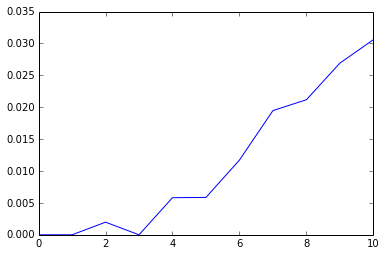

In [123]:
plt.plot(get_diversity_trajectory())

In [251]:
def diversity_plot(xlabel="generation"):
    mpl.rcParams['font.size']=14
    trajectory = get_diversity_trajectory()
    plt.plot(trajectory)    
    plt.ylabel("diversity")
    plt.xlabel(xlabel)

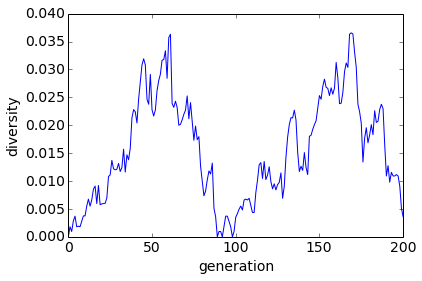

In [252]:
diversity_plot()

### Plot divergence

In [126]:
def get_divergence(population):
    haplotypes = population.keys()
    divergence = 0
    for haplotype in haplotypes:
        frequency = population[haplotype] / float(pop_size)
        divergence += frequency * get_distance(base_haplotype, haplotype)
    return divergence

In [127]:
def get_divergence_trajectory():
    trajectory = [get_divergence(generation) for generation in history]
    return trajectory

In [128]:
get_divergence_trajectory()

[0.0,
 0.0,
 0.001,
 0.0,
 0.0030000000000000001,
 0.0030000000000000001,
 0.0060000000000000001,
 0.01,
 0.010999999999999999,
 0.014000000000000002,
 0.016]

In [253]:
def divergence_plot(xlabel="generation"):
    mpl.rcParams['font.size']=14
    trajectory = get_divergence_trajectory()
    plt.plot(trajectory)
    plt.ylabel("divergence")
    plt.xlabel(xlabel) 

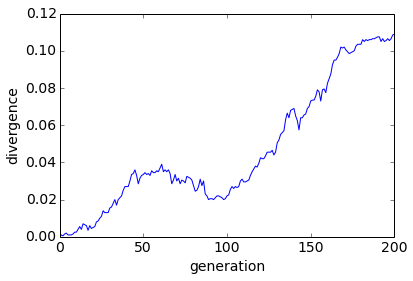

In [254]:
divergence_plot()

### Plot trajectories

In [131]:
def get_frequency(haplotype, generation):
    pop_at_generation = history[generation]
    if haplotype in pop_at_generation:
        return pop_at_generation[haplotype]/float(pop_size)
    else:
        return 0

In [132]:
get_frequency("AAAAAAAAAA", 4)

0.96999999999999997

In [133]:
def get_trajectory(haplotype):
    trajectory = [get_frequency(haplotype, gen) for gen in range(generations)]
    return trajectory

In [134]:
get_trajectory("AAAAAAAAAA")

[1.0,
 1.0,
 0.98999999999999999,
 1.0,
 0.96999999999999997,
 0.96999999999999997,
 0.93999999999999995,
 0.90000000000000002,
 0.89000000000000001,
 0.85999999999999999]

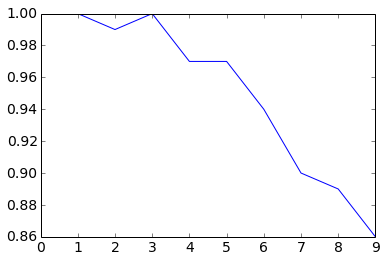

In [135]:
plt.plot(get_trajectory("AAAAAAAAAA"))

In [136]:
def get_all_haplotypes():
    haplotypes = set()   
    for generation in history:
        for haplotype in generation:
            haplotypes.add(haplotype)
    return haplotypes

In [137]:
get_all_haplotypes()

{'AAAAAAAAAA',
 'AAAAAAAAAC',
 'AAAAAAAACA',
 'AAAAAAAAGA',
 'AAAAAAGAAA',
 'AACAAAAAAA',
 'AGAAAAAAAA'}

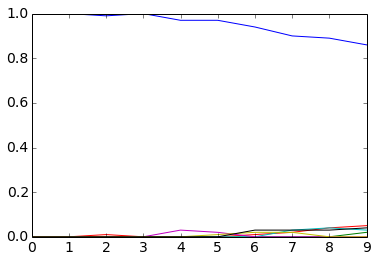

In [138]:
haplotypes = get_all_haplotypes()
for haplotype in haplotypes:
    plt.plot(get_trajectory(haplotype))
plt.show()

In [139]:
colors = ["#781C86", "#571EA2", "#462EB9", "#3F47C9", "#3F63CF", "#447CCD", "#4C90C0", "#56A0AE", "#63AC9A", "#72B485", "#83BA70", "#96BD60", "#AABD52", "#BDBB48", "#CEB541", "#DCAB3C", "#E49938", "#E68133", "#E4632E", "#DF4327", "#DB2122"]

In [140]:
colors_lighter = ["#A567AF", "#8F69C1", "#8474D1", "#7F85DB", "#7F97DF", "#82A8DD", "#88B5D5", "#8FC0C9", "#97C8BC", "#A1CDAD", "#ACD1A0", "#B9D395", "#C6D38C", "#D3D285", "#DECE81", "#E8C77D", "#EDBB7A", "#EEAB77", "#ED9773", "#EA816F", "#E76B6B"]

In [255]:
def stacked_trajectory_plot(xlabel="generation"):
    mpl.rcParams['font.size']=18
    haplotypes = get_all_haplotypes()
    trajectories = [get_trajectory(haplotype) for haplotype in haplotypes]
    plt.stackplot(range(generations), trajectories, colors=colors_lighter)
    plt.ylim(0, 1)
    plt.ylabel("frequency")
    plt.xlabel(xlabel)

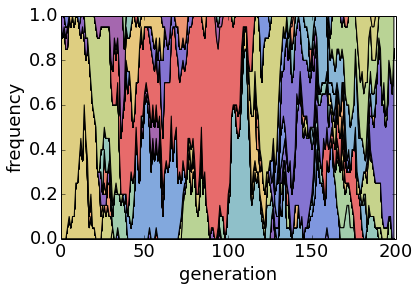

In [256]:
stacked_trajectory_plot()

### Scale up

In [374]:
pop_size = 50
seq_length = 100
generations = 500
mutation_rate = 0.0001 # per gen per individual per site

In [375]:
seq_length * mutation_rate

0.01

In [376]:
2 * pop_size * seq_length * mutation_rate

1.0

In [377]:
base_haplotype = ''.join(["A" for i in range(seq_length)])
pop.clear()
del history[:]
pop[base_haplotype] = pop_size

In [378]:
simulate()

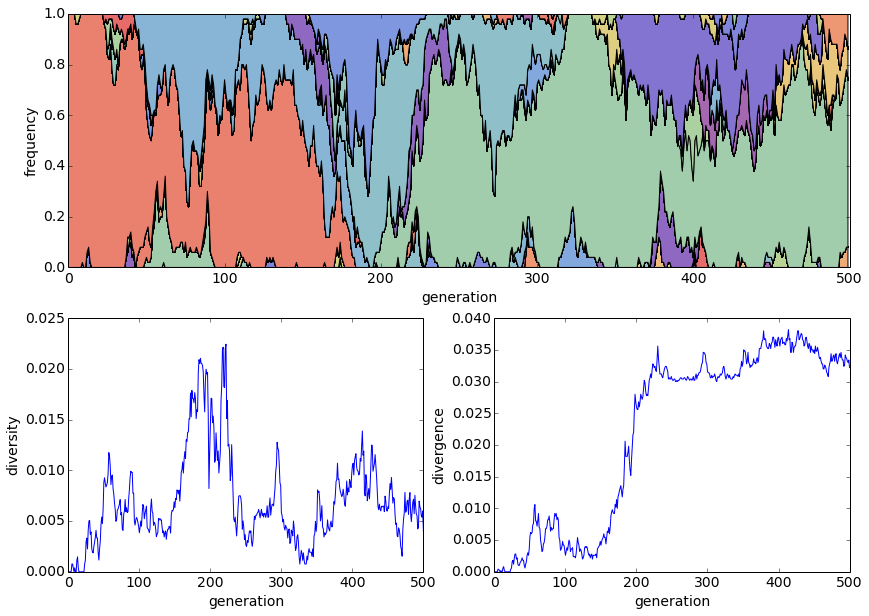

In [379]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot2grid((2,2), (0,0), colspan=2)
stacked_trajectory_plot()
plt.subplot2grid((2,2), (1,0))
diversity_plot()
plt.subplot2grid((2,2), (1,1))
divergence_plot()